In [2]:
from alpaca.trading.client import TradingClient
from decouple import config, Config, RepositoryEnv
from alpaca.data import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
config = Config(RepositoryEnv("C:/Users/barry/CQF/Final Project/ALWorkshop/.env"))
# Get the tokens for API access
api_key = config("ALPACA_TEST_KEY")
secret_key = config("ALPACA_TEST_SECRET")

In [4]:
client = CryptoHistoricalDataClient(api_key=api_key, secret_key=secret_key)

In [ ]:
# change start and end date depending on dataset required (optimsation set vs test set)
start_date=datetime(2024, 1, 1)
end_date=datetime(2024,12, 31)
sym_list = ["BCH/USD", "ETH/USD", "USDT/USD"]
timeframe_unit = TimeFrameUnit.Minute
timeframe_unit_value = 5
data_dict = {}

# Create a directory for CSVs if it doesn't already exist 
output_dir = "historical_data"
os.makedirs(output_dir, exist_ok=True)

for sym in sym_list:
    request_params = CryptoBarsRequest(
        symbol_or_symbols=[sym],
        timeframe=TimeFrame(timeframe_unit_value, timeframe_unit),
        start=start_date,
        end=end_date,
    )
    bars = client.get_crypto_bars(request_params=request_params)
    bars = bars.df
    bars.index = pd.to_datetime(bars.index.get_level_values('timestamp'))

    key = f"{sym.replace('/','')}"
    data_dict[key] = bars

    # Save DataFrame as CSV
    # add date col for CSV
    bars["date"] = bars.index
    csv_filename = os.path.join(output_dir, f"{key}_2024.csv")
    bars.to_csv(csv_filename, index=False)
    print(f"Saved {csv_filename}")

Saved historical_data\BCHUSD_2024.csv


## Read in data to check

In [5]:
sym = "BCHUSD_2023"
df = pd.read_csv(f"{sym}.csv")
df.columns = df.columns.str.capitalize()
df['Date'] = pd.to_datetime(df['Date']) 
filtered_df = df[df['Date'] >= pd.Timestamp('2023-12-01', tz="UTC")]
filtered_df

,Open,High,Low,Close,Volume,Trade_count,Vwap,Date
43889,221.4970,221.6000,221.4210,221.4930,0.0,0.0,0.0,2023-12-01 00:00:00+00:00
43890,221.5850,221.5850,221.4185,221.4500,0.0,0.0,0.0,2023-12-01 00:05:00+00:00
43891,221.3100,221.4000,221.2600,221.3680,0.0,0.0,0.0,2023-12-01 00:10:00+00:00
43892,221.2590,221.3245,221.2265,221.3115,0.0,0.0,0.0,2023-12-01 00:15:00+00:00
43893,221.2500,221.2500,221.2500,221.2500,0.0,0.0,0.0,2023-12-01 00:20:00+00:00
...,...,...,...,...,...,...,...,...
52463,271.4000,271.8940,271.2805,271.8940,0.0,0.0,0.0,2023-12-30 23:40:00+00:00
52464,271.8000,272.0450,271.1150,271.5170,0.0,0.0,0.0,2023-12-30 23:45:00+00:00
52465,271.4300,271.6240,271.0850,271.2310,0.0,0.0,0.0,2023-12-30 23:50:00+00:00
52466,271.1650,271.2970,270.3250,270.4850,0.0,0.0,0.0,2023-12-30 23:55:00+00:00


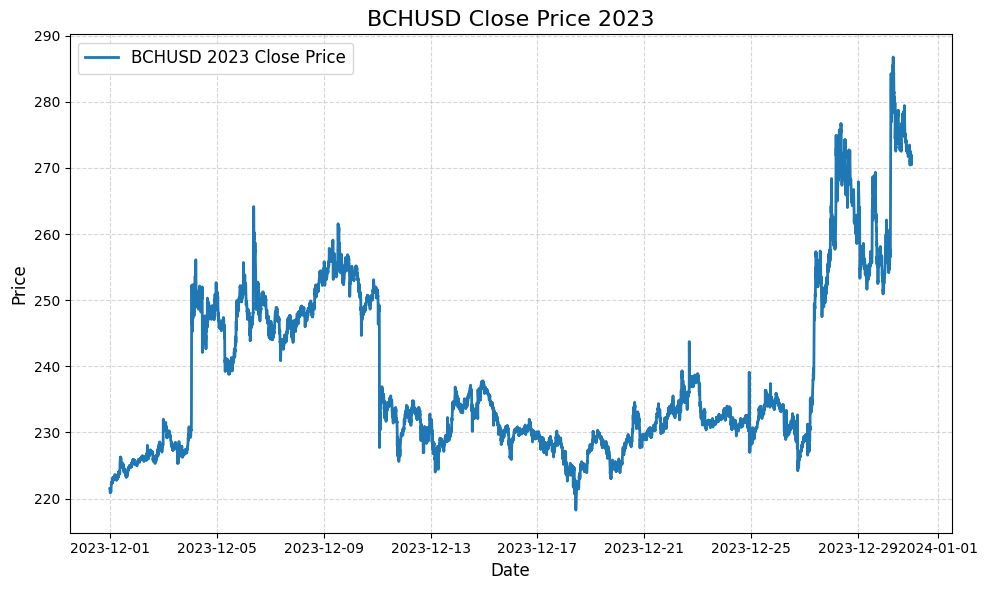

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["Date"], filtered_df["Close"], label="BCHUSD 2023 Close Price", linewidth=2)
plt.title("BCHUSD Close Price 2023", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()